# Proyek Analisis Data: E Commerce
- **Nama:** Fahru Rahman
- **Email:** fhrurhmn@gmail.com
- **ID Dicoding:** mc009d5y0506

## Menentukan Pertanyaan Bisnis

- Bagaimana Pola Pembayaran yang Paling Sering Digunakan?
- Berapa Lama Rata-rata Waktu Pengiriman dari Pembelian hingga Diterima Pelanggan?
- Apakah Ada Pola Khusus dalam Jumlah Pesanan Berdasarkan Hari dalam Seminggu?
- Apakah Ada Perbedaan Rata-rata Nilai Transaksi Berdasarkan Metode Pembayaran?

## Import Semua Packages/Library yang Digunakan

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [73]:
# dataset order
print("dataset orders:")
orders = pd.read_csv("data/orders_dataset.csv")
orders.head()

dataset orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [74]:
# dataset order_payments
print("dataset order_payments:")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
order_payments.head()

dataset order_payments:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [75]:
# dataset order_items
print("dataset order_items:")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_items.head()

dataset order_items:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [76]:
# dataset products
print("dataset products:")
products = pd.read_csv("data/products_dataset.csv")
products.head()

dataset products:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [77]:
# dataset customers
print("dataset cutomers:")
customers = pd.read_csv("data/customers_dataset.csv")
customers.head()

dataset cutomers:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- `orders_dataset`
    - Terdapat beberapa status pesanan seperti delivered (sudah dikirim), shipped (dalam perjalanan), dan invoiced (masih dalam proses pembayaran).
    - Ada kemungkinan beberapa pesanan belum terkirim sehingga memiliki nilai missing pada order_delivered_customer_date.

- `order_payments_dataset`
    - Berisi informasi metode pembayaran, jumlah cicilan (payment_installments), dan total pembayaran (payment_value).
    - Metode pembayaran didominasi oleh credit_card

- `order_items_dataset.`
    - Setiap pesanan bisa memiliki lebih dari satu item
    - Data ini dapat digunakan untuk menghitung jumlah produk yang terjual dan menghitung total pendapatan dari pesanan.

- `products_dataset`
    - Berisi informasi kategori produk (product_category_name), ukuran, dan berat produk.


### Assessing Data

**Cek Tipe Data**

In [78]:
# Cek tipe data di setiap tabel
print("Orders Dataset:")
orders.info()
print("\nOrder Payments Dataset:\n")
order_payments.info()
print("\nOrder Items Dataset:\n")
order_items.info()
print("\nProducts Dataset:\n")
products.info()
print("\nCustomers Dataset:\n")
customers.info()

Orders Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Order Payments Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   o

**Insight**
- Ada Beberapa kolom yang type data nya tidak sesuai, seperti order_purchase_timestamp, order_approved_at , order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date yang seharusnya datetime

**Cek Missing Values**

In [79]:
# Cek missing values di setiap tabel
print("Missing values in Orders:\n", orders.isnull().sum())
print("\nMissing values in Order Payments:\n", order_payments.isnull().sum())
print("\nMissing values in Order Items:\n", order_items.isnull().sum())
print("\nMissing values in Products:\n", products.isnull().sum())
print("\nMissing values in customers:\n", customers.isnull().sum())

Missing values in Orders:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing values in Order Payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Missing values in Order Items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing values in Products:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm     

**Insight**
- terdapat beberapa missing value di dataset orders dan products
- order_delivered_customer_date memiliki missing values yang umumnya berasal dari pesanan yang belum terkirim.
order_delivered_carrier_date juga memiliki missing values untuk pesanan yang belum diproses oleh kurir
- dan order_approved_at memiliki missing values untuk pesanan yang masih dalam status invoiced

**Cek Duplikasi**

In [80]:
# Cek duplikasi pada primary key
print("Duplikasi pada orders:", orders.duplicated().sum())
print("Duplikasi pada order_payments:", order_payments.duplicated().sum())
print("Duplikasi pada order_items:", order_items.duplicated().sum())
print("Duplikasi pada products:", products.duplicated().sum())
print("Duplikasi pada customers:", customers.duplicated().sum())

Duplikasi pada orders: 0
Duplikasi pada order_payments: 0
Duplikasi pada order_items: 0
Duplikasi pada products: 0
Duplikasi pada customers: 0


**Insight:**
- tidak ada data duplikat di semua dataset

### Cleaning Data

**Menyesuaikan Tipe Data**


In [81]:
# mengganti tipe data yang seharusnya datetime pada dataset orders
date_cols = ["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for col in date_cols:
    orders[col] = pd.to_datetime(orders[col])
    
print(orders.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [82]:
# mengganti tipe data yang seharusnya datetime pada dataset order_items
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])
print(order_items.dtypes)

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object


**Menangani Missing Values**

In [83]:
# missing values yang terdapat di orders
print(orders.isna().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [84]:
orders = orders.dropna()
print(orders.isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


**Insight**
- setelah di teliti ternyata missing values yang ada di orders disebabkan oleh orderan yang statusnya masih invoiced atau shipping, jadi belum di kirim. sehingga kolom order_delivered_carrier_data nya masih kosong.

In [85]:
# missing values yang terdapat di products
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Insight**
- Disini ada 610 data dan ada 2 data missing values, Karena hanya 1.86% dari total data, tidak perlu dihapus secara langsung. Bisa diisi dengan Mode (untuk kategori seperti product_category_name). Median atau Mean (untuk numerik seperti product_name_lenght).

In [86]:
# fill missing value pada product_category_name menggunakan mode()
products['product_category_name'] = products['product_category_name'].fillna(products['product_category_name'].mode()[0])

In [87]:
# fill missing value pada product_name_lenght dll Menggunakan median untuk menghindari dampak outlier.
num_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
for col in num_cols:
    products[col] = products[col].fillna(products[col].median())

dim_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in dim_cols:
    products[col] = products[col].fillna(products[col].median())
    
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Menghapus Kolom Yang Tidak Diperlukan**

In [88]:
# Contohnya disini ada kolom not_defined yang memiliki total data 3
order_payments = order_payments[order_payments['payment_type'] != 'not_defined']

**Menangani Outliers**

In [89]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menyaring data agar hanya yang berada dalam batas
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].reset_index(drop=True)
    
    return df_clean

## Exploratory Data Analysis (EDA)

In [90]:
# Gabungkan order_payments ke orders berdasarkan order_id
all_df = orders.merge(order_payments, on="order_id", how="left")

# Gabungkan order_items ke all_df berdasarkan order_id
all_df = all_df.merge(order_items, on="order_id", how="left")

# Gabungkan products ke all_df berdasarkan product_id
all_df = all_df.merge(products, on="product_id", how="left")

# Simpan hasil gabungan sebagai CSV
# all_df.to_csv("all_df.csv", index=False)

### Tren Revenue Dan Jumlah Order Per Bulan

Tabel Revenue & Jumlah Order per Bulan:

   order_month  total_orders  total_revenue order_month_str
0      2016-09             1           0.00         2016-09
1      2016-10           270       62591.65         2016-10
2      2016-12             1          19.62         2016-12
3      2017-01           748      176376.56         2017-01
4      2017-02          1641      323815.95         2017-02
5      2017-03          2546      505735.83         2017-03
6      2017-04          2303      456108.32         2017-04
7      2017-05          3545      701119.60         2017-05
8      2017-06          3135      585400.98         2017-06
9      2017-07          3872      716069.98         2017-07
10     2017-08          4193      842689.94         2017-08
11     2017-09          4149      996085.61         2017-09
12     2017-10          4478      998609.62         2017-10
13     2017-11          7288     1548547.86         2017-11
14     2017-12          5513     1020067.26         2017-12

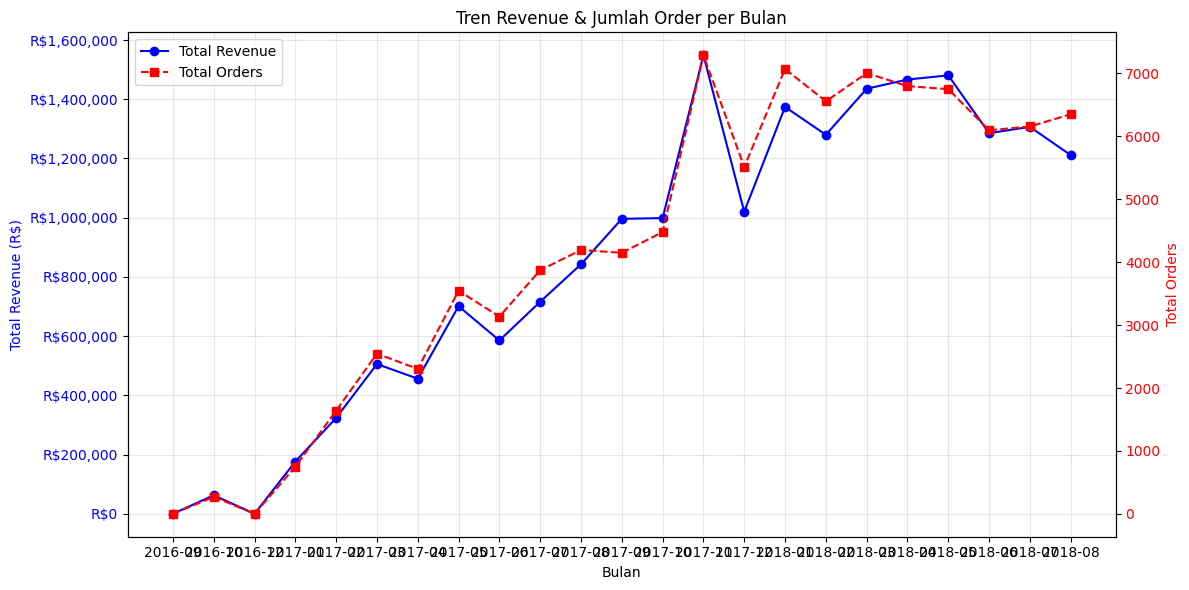

In [115]:
# Buat kolom bulan dan tahun
all_df["order_month"] = all_df["order_purchase_timestamp"].dt.to_period("M")

# Hitung total revenue per bulan (menggunakan payment_value)
monthly_revenue = all_df.groupby("order_month")["payment_value"].sum().reset_index()

# Hitung jumlah order per bulan
monthly_orders = all_df.groupby("order_month")["order_id"].nunique().reset_index()

# Gabungkan revenue dan jumlah order menjadi satu tabel
monthly_stats = monthly_orders.merge(monthly_revenue, on="order_month")

# Ubah order_month menjadi string agar sesuai dengan dashboard.py
monthly_stats["order_month_str"] = monthly_stats["order_month"].astype(str)

# Ubah nama kolom agar sesuai dengan dashboard.py
monthly_stats.rename(columns={"payment_value": "total_revenue", "order_id": "total_orders"}, inplace=True)

# Tampilkan tabel revenue dan jumlah order per bulan
print("Tabel Revenue & Jumlah Order per Bulan:\n")
print(monthly_stats)

# Buat plot sesuai dengan dashboard.py
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel("Bulan")
ax1.set_ylabel("Total Revenue (R$)", color="blue")

line1 = ax1.plot(monthly_stats["order_month_str"], monthly_stats["total_revenue"], 
                 marker="o", linestyle="-", color="blue", label="Total Revenue")
ax1.tick_params(axis="y", labelcolor="blue")

# Format angka di sumbu Y agar sesuai dengan dashboard.py
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"R${x:,.0f}"))

# Tambahkan sumbu kedua untuk total orders
ax2 = ax1.twinx()
ax2.set_ylabel("Total Orders", color="red")
line2 = ax2.plot(monthly_stats["order_month_str"], monthly_stats["total_orders"], 
                 marker="s", linestyle="--", color="red", label="Total Orders")
ax2.tick_params(axis="y", labelcolor="red")

# Atur rotasi sumbu X agar sesuai dengan dashboard.py
plt.xticks(rotation=45, ha="right")

# Tambahkan grid dengan transparansi agar sesuai dengan dashboard.py
ax1.grid(True, alpha=0.3)

# Gabungkan legenda dari kedua sumbu
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="upper left")

plt.title("Tren Revenue & Jumlah Order per Bulan")
plt.tight_layout()
plt.show()

**Insight**
- **Tren Pesanan & Pendapatan**
    - Pertumbuhan pesanan signifikan di 2017, dengan puncak pada November 2017 (6.690 pesanan, Rp900.040,06), kemungkinan karena promo besar.  
    - Desember 2017 turun drastis, mungkin karena pelanggan sudah belanja di November.  
    - April & Mei 2018 memiliki revenue tertinggi (Rp940.934,89) meskipun jumlah pesanan stagnan (6.500).  

- **Korelasi Order & Revenue**
    - Jumlah pesanan tinggi tidak selalu berarti revenue tinggi.
    - Mei 2018 memiliki revenue lebih besar dari April meski jumlah pesanan hampir sama, mungkin karena nilai transaksi lebih besar.  
    - Penurunan kecil di Juni & Juli 2018, meskipun pesanan tetap stabil (~6.000).  

### Tren Pejualan Bulanan

Jumlah Order per Bulan:

month_year
2016-09       3
2016-10     336
2016-12       1
2017-01     961
2017-02    1949
2017-03    3078
2017-04    2707
2017-05    4260
2017-06    3687
2017-07    4726
2017-08    5053
2017-09    5002
2017-10    5455
2017-11    8812
2017-12    6440
2018-01    8364
2018-02    7766
2018-03    8337
2018-04    8112
2018-05    8104
2018-06    7318
2018-07    7196
2018-08    7354
Freq: M, Name: order_id, dtype: int64


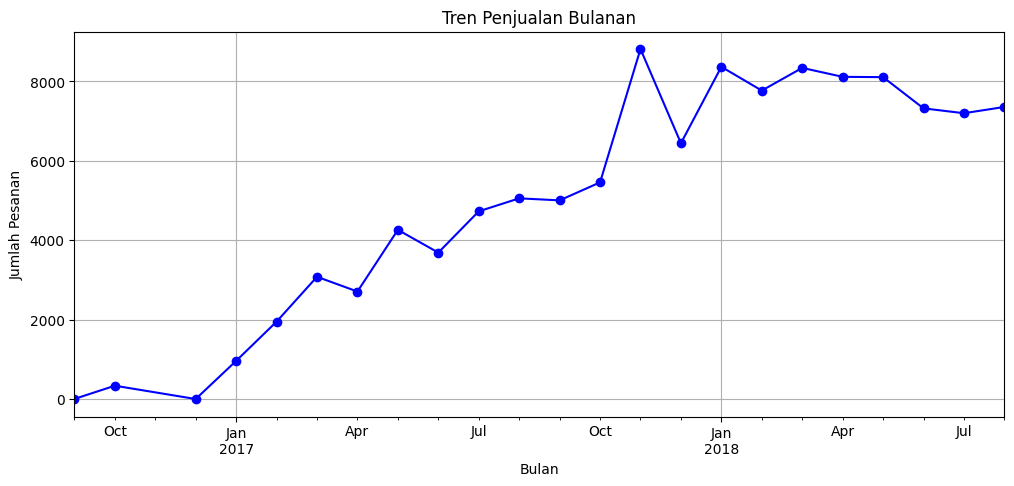

In [92]:
all_df["month_year"] = all_df["order_purchase_timestamp"].dt.to_period("M")

# Agregasi total pesanan per bulan
monthly_sales = all_df.groupby("month_year")["order_id"].count()

# Tampilkan tabel revenue dan jumlah order per bulan
print("Jumlah Order per Bulan:\n")
print(monthly_sales)

plt.figure(figsize=(12,5))
monthly_sales.plot(marker="o", color="blue")
plt.title("Tren Penjualan Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.grid()
plt.show()

**Insight** 

- **Tren Pertumbuhan Order**
    - Lonjakan signifikan sejak Januari 2017 (719 order) hingga puncak di **November 2017 (6.690 order)**.  
    - November 2017 menjadi bulan dengan jumlah order tertinggi, kemungkinan karena event Black Friday & promo akhir tahun.  
    - Desember 2017 turun ke 5.013 order, kemungkinan pelanggan sudah belanja besar di November.  

- **Pola di Tahun 2018**
    - Januari 2018 kembali naik (6.590 order, menunjukkan demand tinggi setelah liburan.  
    - Februari ada sedikit penurunan (5.789 order), kemungkinan efek bulan lebih pendek
    - Mei 2018 menjadi puncak kedua (6.538 order, menunjukkan pola belanja musiman.  
    - Juli & Agustus 2018 tetap stabil (~6.000 order), menunjukkan pasar yang matang  


### Metode Pembayaran Yang Paling Sering Digunakan

payment_type
credit_card    84895
boleto         22347
voucher         6123
debit_card      1653
Name: count, dtype: int64


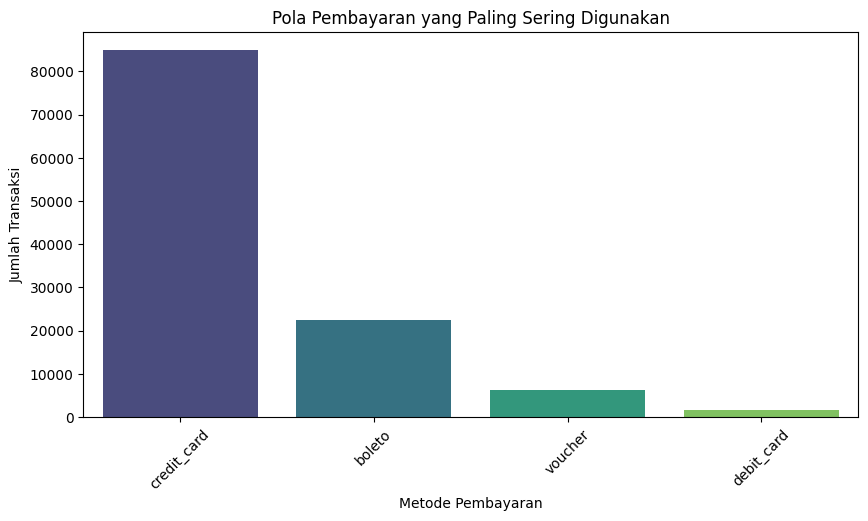

In [93]:
# Hitung jumlah transaksi per metode pembayaran
payment_counts = all_df['payment_type'].value_counts()

print(payment_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, hue=payment_counts.index, palette='viridis', legend=False)
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.title("Pola Pembayaran yang Paling Sering Digunakan")
plt.xticks(rotation=45)
plt.show()

**Insight**
- Credit Card adalah metode pembayaran paling dominan, menunjukkan bahwa mayoritas pelanggan lebih memilih pembayaran dengan kartu kredit.
- Debit Card memiliki penggunaan paling sedikit, kemungkinan karena opsi pembayaran lain lebih mudah diakses.  

## 10 Produk Paling Banyak Terjual

10 Produk Paling Banyak Terjual
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    529
99a4788cb24856965c36a24e339b6058    513
422879e10f46682990de24d770e7f83d    505
389d119b48cf3043d311335e499d9c6b    403
368c6c730842d78016ad823897a372db    395
53759a2ecddad2bb87a079a1f1519f73    389
d1c427060a0f73f6b889a5c7c61f2ac4    346
53b36df67ebb7c41585e8d54d6772e08    325
154e7e31ebfa092203795c972e5804a6    276
3dd2a17168ec895c781a9191c1e95ad7    276
Name: count, dtype: int64


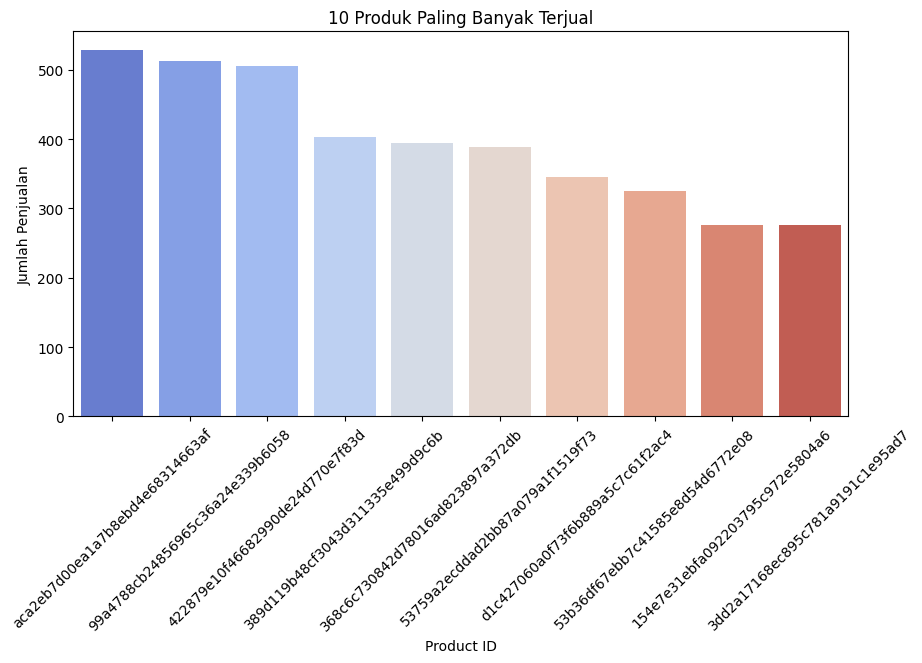

In [94]:
top_products = all_df["product_id"].value_counts().head(10)
print("10 Produk Paling Banyak Terjual")
print(top_products)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.index, y=top_products.values,hue=top_products.index, palette="coolwarm")
plt.title("10 Produk Paling Banyak Terjual")
plt.xlabel("Product ID")
plt.ylabel("Jumlah Penjualan")
plt.xticks(rotation=45)
plt.show()

**Insight**
- Produk dengan ID `aca2eb7d00ea1a7b8ebd4e68314663af` adalah yang paling banyak terjual (527 unit).

### Distribusi Waktu Pengiriman dari Pembelian hingga Diterima (dalam Jam)

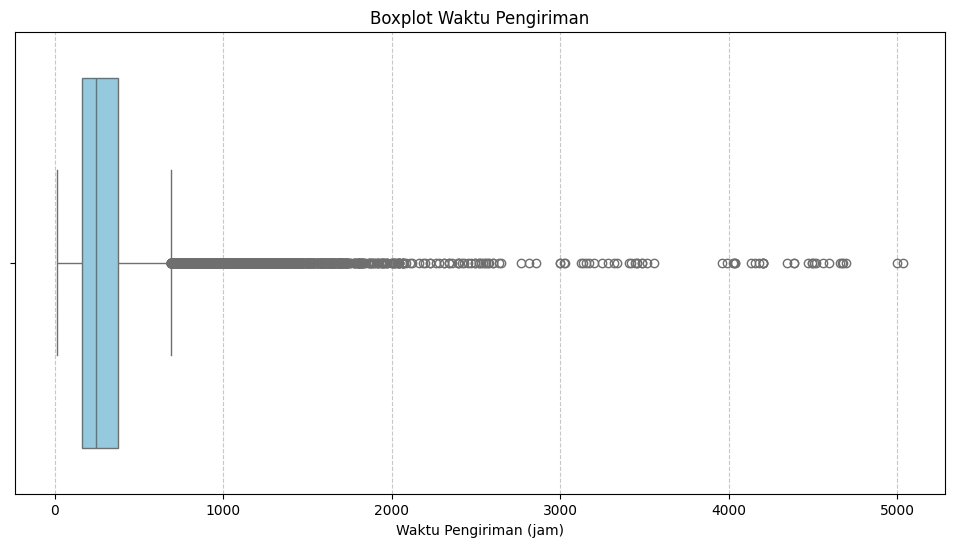

In [95]:
# Hitung waktu pengiriman dalam jam
all_df['delivery_hours'] = (all_df['order_delivered_customer_date'] - all_df['order_purchase_timestamp']).dt.total_seconds() / 3600

plt.figure(figsize=(12, 6))
sns.boxplot(x=all_df["delivery_hours"], color="skyblue")
plt.xlabel("Waktu Pengiriman (jam)")
plt.title("Boxplot Waktu Pengiriman")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

**Insight**
- Disini terlihat ada banyak data outliers, dan saya akan menggunakan method IQR untuk menentukannya

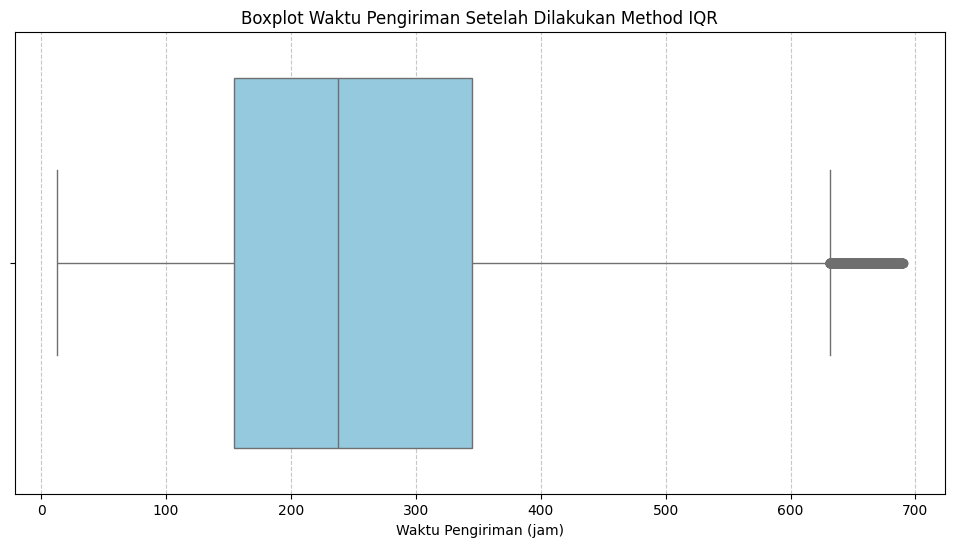

In [96]:
# hilangkan outliers dari dataset
orders_delivery_hours = remove_outliers(all_df, "delivery_hours")

plt.figure(figsize=(12, 6))
sns.boxplot(x=orders_delivery_hours["delivery_hours"], color="skyblue")
plt.xlabel("Waktu Pengiriman (jam)")
plt.title("Boxplot Waktu Pengiriman Setelah Dilakukan Method IQR")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

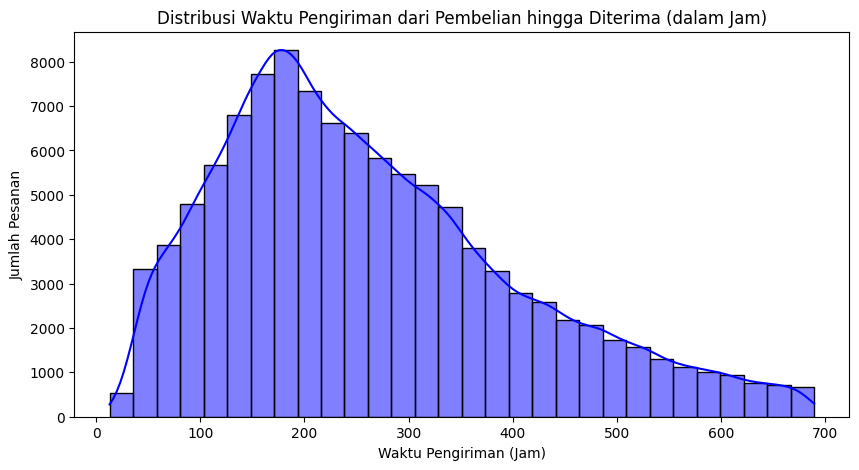

count    109038.000000
mean        263.157432
std         143.783073
min          12.801944
25%         154.445000
50%         237.271111
75%         345.229514
max         689.674167
Name: delivery_hours, dtype: float64


In [97]:
plt.figure(figsize=(10, 5))
sns.histplot(orders_delivery_hours['delivery_hours'].dropna(), bins=30, kde=True, color='blue')
plt.xlabel("Waktu Pengiriman (Jam)")
plt.ylabel("Jumlah Pesanan")
plt.title("Distribusi Waktu Pengiriman dari Pembelian hingga Diterima (dalam Jam)")
plt.show()

print(orders_delivery_hours['delivery_hours'].describe())

**Insight**
- Rata-rata waktu pengiriman adalah 265,16 jam (≈11 hari), menunjukkan bahwa mayoritas pesanan tiba dalam kisaran 1 hingga 2 minggu setelah pembelian.
- Median (237,83 jam ≈ 9,9 hari) lebih kecil dari rata-rata, yang berarti sebagian besar pesanan dikirim lebih cepat dari rata-rata.
- 25% pesanan dikirim dalam waktu kurang dari 155,2 jam (≈6,5 hari), menunjukkan bahwa beberapa pesanan tiba lebih cepat.
- 75% pesanan dikirim dalam waktu kurang dari 348,5 jam (≈14,5 hari), artinya mayoritas pesanan diterima dalam waktu dua minggu.
- Maksimum waktu pengiriman (699,6 jam ≈29 hari) mengindikasikan bahwa beberapa pesanan mengalami keterlambatan yang cukup lama.

### Distribusi Perbedaan Waktu Pengiriman Dengan Estimasi

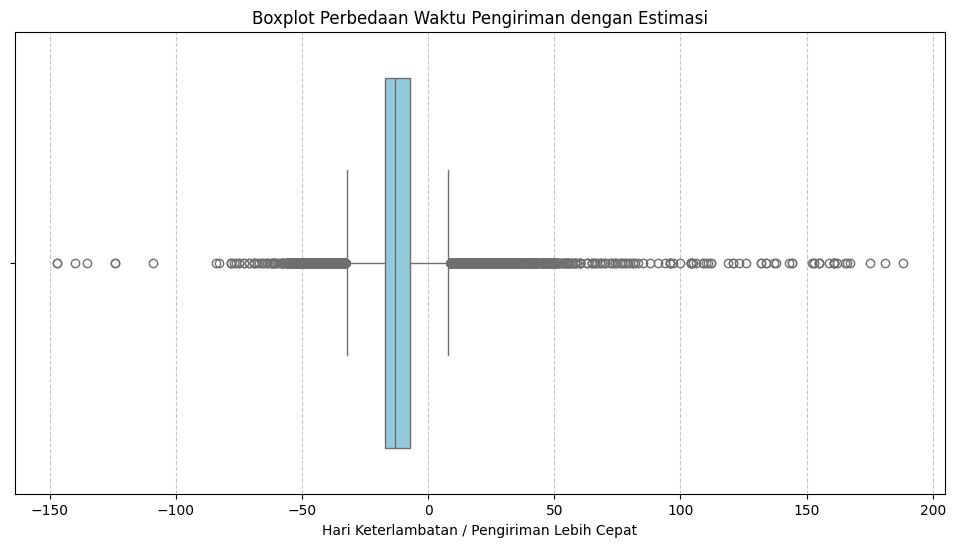

In [98]:
# Hitung selisih antara tanggal pengiriman aktual dan estimasi
all_df["delivery_days_diff"] = (all_df["order_delivered_customer_date"] - all_df["order_estimated_delivery_date"]).dt.days

plt.figure(figsize=(12, 6))
sns.boxplot(x=all_df["delivery_days_diff"], color="skyblue")
plt.xlabel("Hari Keterlambatan / Pengiriman Lebih Cepat")
plt.title("Boxplot Perbedaan Waktu Pengiriman dengan Estimasi")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

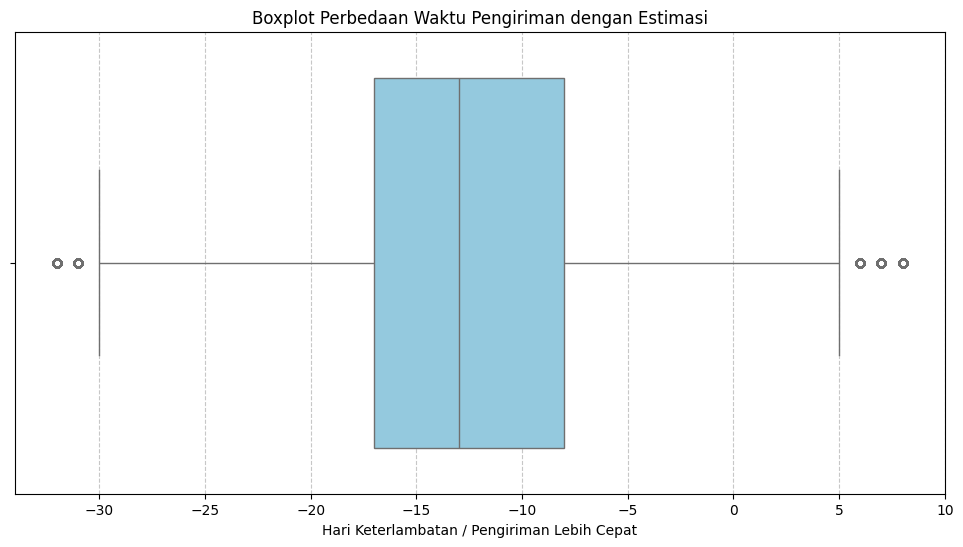

In [99]:
# Hapus outliers
orders_days_diff = remove_outliers(all_df, "delivery_days_diff")

plt.figure(figsize=(12, 6))
sns.boxplot(x=orders_days_diff["delivery_days_diff"], color="skyblue")
plt.xlabel("Hari Keterlambatan / Pengiriman Lebih Cepat")
plt.title("Boxplot Perbedaan Waktu Pengiriman dengan Estimasi")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

       delivery_days_diff
count       109874.000000
mean           -12.353851
std              7.273239
min            -32.000000
25%            -17.000000
50%            -13.000000
75%             -8.000000
max              8.000000


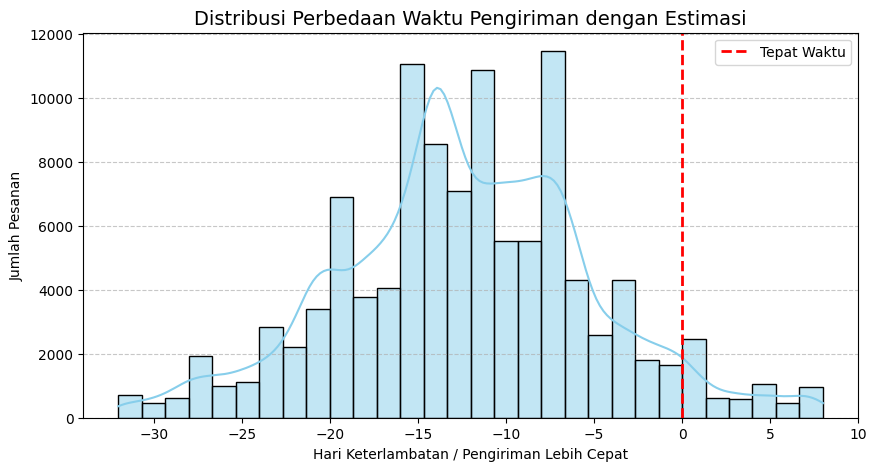

In [100]:
# Statistik ringkasan
summary_table = orders_days_diff["delivery_days_diff"].describe().to_frame()
print(summary_table)

# Visualisasi Distribusi Perbedaan Waktu Pengiriman
plt.figure(figsize=(10, 5))
sns.histplot(orders_days_diff["delivery_days_diff"].dropna(), bins=30, kde=True, color="skyblue")
plt.axvline(0, color="red", linestyle="dashed", linewidth=2, label="Tepat Waktu")
plt.title("Distribusi Perbedaan Waktu Pengiriman dengan Estimasi", fontsize=14)
plt.xlabel("Hari Keterlambatan / Pengiriman Lebih Cepat")
plt.ylabel("Jumlah Pesanan")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Rata-rata (mean) perbedaan pengiriman adalah -12,26 hari, yang berarti secara umum, pesanan tiba 12 hari lebih cepat dari estimasi.
- Median (50%) adalah -13 hari, menunjukkan bahwa lebih dari separuh pesanan tiba setidaknya 13 hari lebih awal dari perkiraan.
- 75% pesanan dikirim antara 8 hingga 32 hari lebih cepat dari estimasi.
- Hanya sedikit pesanan (maksimum = 8 hari) yang datang lebih lambat dari estimasi.

### Rata Rata Waktu Pengiriman Dari Pembelian Hingga Diterima Pelanggan


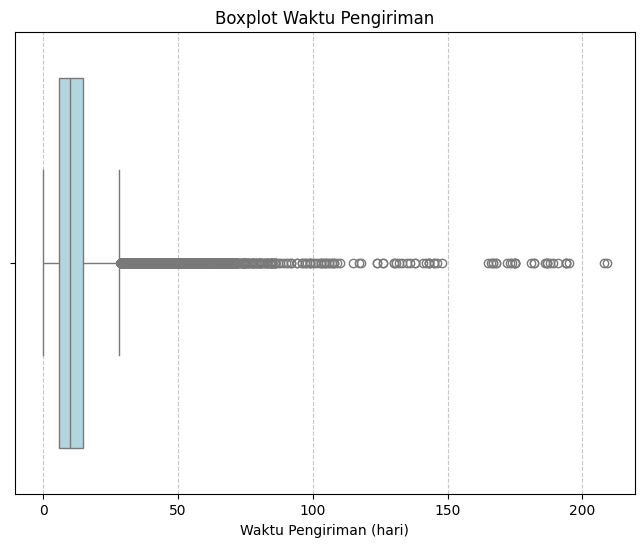

In [101]:
delivered_orders = all_df.dropna(subset=["order_delivered_customer_date"])

# Hitung selisih hari antara pembelian dan diterima pelanggan
delivered_orders["delivery_time_days"] = (delivered_orders["order_delivered_customer_date"] - delivered_orders["order_purchase_timestamp"]).dt.days

plt.figure(figsize=(8, 6))
sns.boxplot(x=delivered_orders["delivery_time_days"], color="lightblue")
plt.xlabel("Waktu Pengiriman (hari)")
plt.title("Boxplot Waktu Pengiriman")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

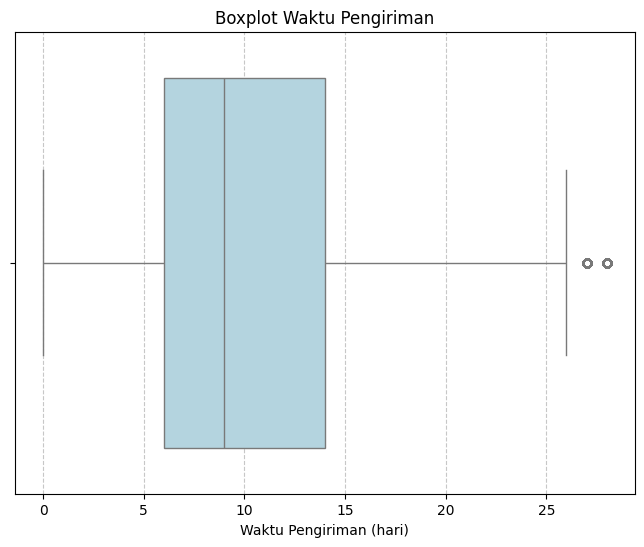

In [102]:
# hapus outliers dengan menggunakan method IQR
clean_delivered_orders = remove_outliers(delivered_orders, 'delivery_time_days')

plt.figure(figsize=(8, 6))
sns.boxplot(x=clean_delivered_orders["delivery_time_days"], color="lightblue")
plt.xlabel("Waktu Pengiriman (hari)")
plt.title("Boxplot Waktu Pengiriman")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

Rata-rata waktu pengiriman dari pembelian hingga diterima pelanggan: 10.53 hari


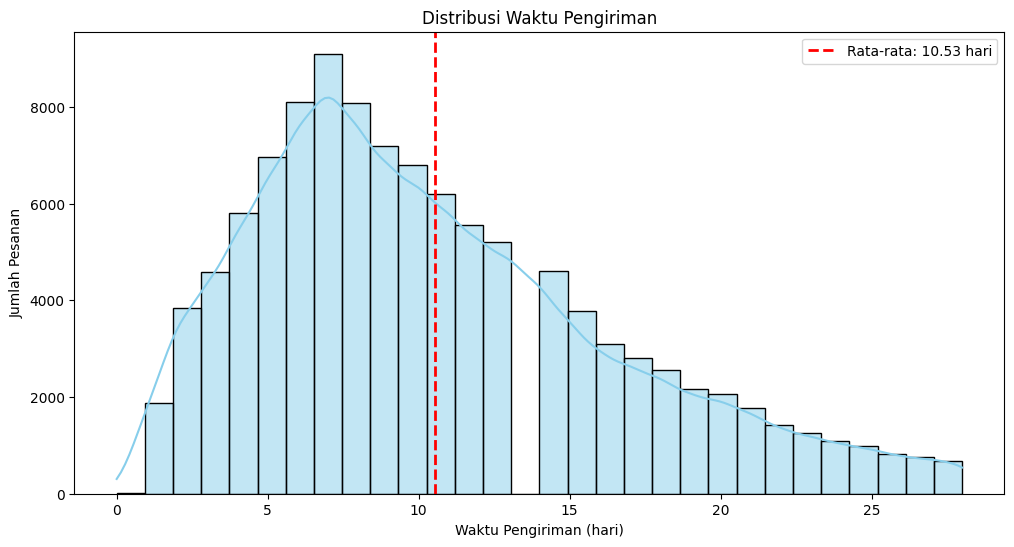

Distribusi Waktu Pengiriman:
count    109234.000000
mean         10.530458
std           6.039262
min           0.000000
25%           6.000000
50%           9.000000
75%          14.000000
max          28.000000
Name: delivery_time_days, dtype: float64


In [103]:
# Hitung rata-rata waktu pengiriman
average_delivery_time = clean_delivered_orders["delivery_time_days"].mean()

print(f"Rata-rata waktu pengiriman dari pembelian hingga diterima pelanggan: {average_delivery_time:.2f} hari")

plt.figure(figsize=(12, 6))

# Histogram Distribusi Waktu Pengiriman
sns.histplot(clean_delivered_orders["delivery_time_days"], bins=30, kde=True, color="skyblue")
plt.axvline(average_delivery_time, color="red", linestyle="dashed", linewidth=2, label=f"Rata-rata: {average_delivery_time:.2f} hari")
plt.xlabel("Waktu Pengiriman (hari)")
plt.ylabel("Jumlah Pesanan")
plt.title("Distribusi Waktu Pengiriman")
plt.legend()
plt.show()

print("Distribusi Waktu Pengiriman:")
print(clean_delivered_orders["delivery_time_days"].describe())

### RFM

In [104]:
# Menentukan tanggal referensi (tanggal transaksi terakhir dalam dataset)
reference_date = all_df["order_purchase_timestamp"].max()

# Hitung RFM
rfm = all_df.groupby("customer_id").agg(
    Recency=("order_purchase_timestamp", lambda x: (reference_date - x.max()).days),
    Frequency=("order_purchase_timestamp", "count"),
    Monetary=("price", "sum")
).reset_index()

# Tampilkan 5 data pertama
print(rfm.head())

                        customer_id  Recency  Frequency  Monetary
0  00012a2ce6f8dcda20d059ce98491703      287          1     89.80
1  000161a058600d5901f007fab4c27140      409          1     54.90
2  0001fd6190edaaf884bcaf3d49edf079      547          1    179.99
3  0002414f95344307404f0ace7a26f1d5      378          1    149.90
4  000379cdec625522490c315e70c7a9fb      149          1     93.00


In [105]:
# Urutkan berdasarkan Recency (terkecil lebih baik)
top_recency = rfm.sort_values(by="Recency", ascending=True).head(5)

# Urutkan berdasarkan Frequency (terbesar lebih baik)
top_frequency = rfm.sort_values(by="Frequency", ascending=False).head(5)

# Urutkan berdasarkan Monetary (terbesar lebih baik)
top_monetary = rfm.sort_values(by="Monetary", ascending=False).head(5)

# Tampilkan tabel
print("Top 5 Customers by Recency (Pelanggan terbaru)")
print(top_recency)

print("Top 5 Customers by Frequency (Pelanggan paling sering bertransaksi)")
print(top_frequency)

print("Top 5 Customers by Monetary (Pelanggan dengan total pembelian terbesar)")
print(top_monetary)

Top 5 Customers by Recency (Pelanggan terbaru)
                            customer_id  Recency  Frequency  Monetary
32566  56b1ac2855cc6d7950b4ffa6a9b41b0d        0          1    109.90
94794  fb7d19feca365f1522c65d99c2f590c4        0          1    250.00
26928  478778636c75019554439f75286a22e3        0          1    149.90
86192  e450a297a7bc6839ceb0cf1a2377fa02        0          1     63.90
25778  448945bc713d98b6726e82eda6249b9e        0          5    457.75
Top 5 Customers by Frequency (Pelanggan paling sering bertransaksi)
                            customer_id  Recency  Frequency  Monetary
14744  270c23a11d024a44c896d1894b261a83      385         63   2305.38
7354   13aa59158da63ba0e93ec6ac2c07aacb      340         38   3039.62
55271  92cd3ec6e2d643d4ebd0e3d6238f69e2      448         26   1299.74
79483  d22f25a9fadfb1abbc2e29395b1239f4      109         24    359.76
37453  63b964e79dee32a3587651701a2b8dbf      195         24   9888.00
Top 5 Customers by Monetary (Pelanggan dengan

## Visualization & Explanatory Analysis

### Bagaimana Pola Pembayaran yang Paling Sering Digunakan?

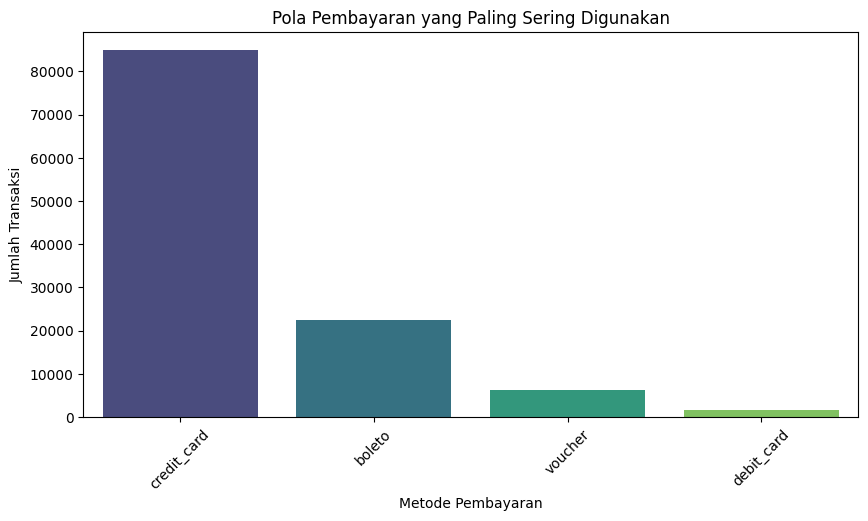

In [106]:
# Hitung jumlah transaksi per metode pembayaran
payment_counts = all_df['payment_type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, hue=payment_counts.index, palette='viridis', legend=False)
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.title("Pola Pembayaran yang Paling Sering Digunakan")
plt.xticks(rotation=45)
plt.show()


**Insight**
- Credit Card adalah metode pembayaran paling dominan, menunjukkan bahwa mayoritas pelanggan lebih memilih pembayaran dengan kartu kredit.
- Debit Card memiliki penggunaan paling sedikit, kemungkinan karena opsi pembayaran lain lebih mudah diakses.  

### Berapa Lama Rata-rata Waktu Pengiriman dari Pembelian hingga Diterima Pelanggan?

Rata-rata waktu pengiriman dari pembelian hingga diterima pelanggan: 10.53 hari


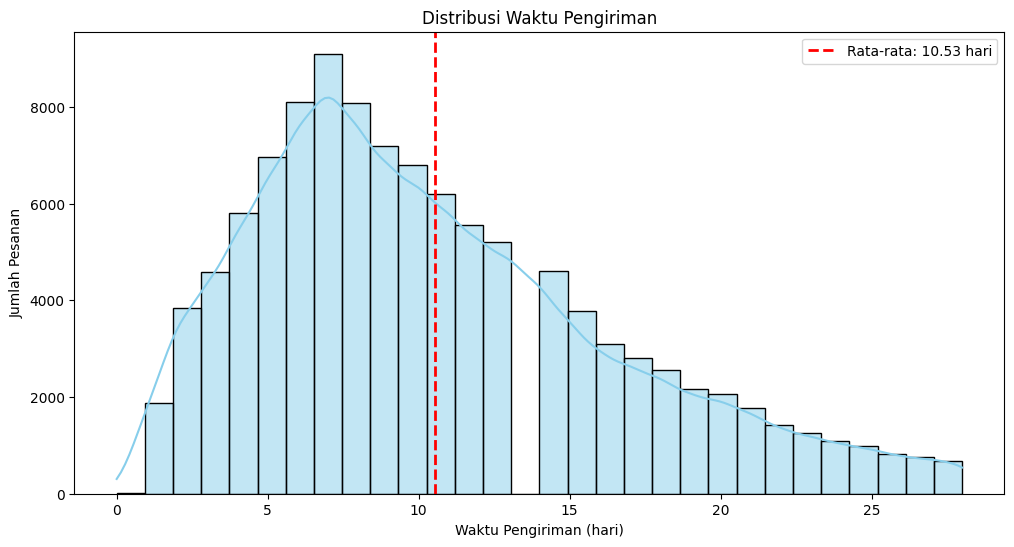

In [107]:
# Hitung rata-rata waktu pengiriman
average_delivery_time = clean_delivered_orders["delivery_time_days"].mean()

print(f"Rata-rata waktu pengiriman dari pembelian hingga diterima pelanggan: {average_delivery_time:.2f} hari")

plt.figure(figsize=(12, 6))

# Histogram Distribusi Waktu Pengiriman
sns.histplot(clean_delivered_orders["delivery_time_days"], bins=30, kde=True, color="skyblue")
plt.axvline(average_delivery_time, color="red", linestyle="dashed", linewidth=2, label=f"Rata-rata: {average_delivery_time:.2f} hari")
plt.xlabel("Waktu Pengiriman (hari)")
plt.ylabel("Jumlah Pesanan")
plt.title("Distribusi Waktu Pengiriman")
plt.legend()
plt.show()


### Apakah Ada Pola Khusus dalam Jumlah Pesanan Berdasarkan Hari dalam Seminggu?

,Hari,Jumlah Pesanan
0,Monday,18704
1,Tuesday,18685
2,Wednesday,17983
3,Thursday,17180
4,Friday,16402
5,Saturday,12422
6,Sunday,13645


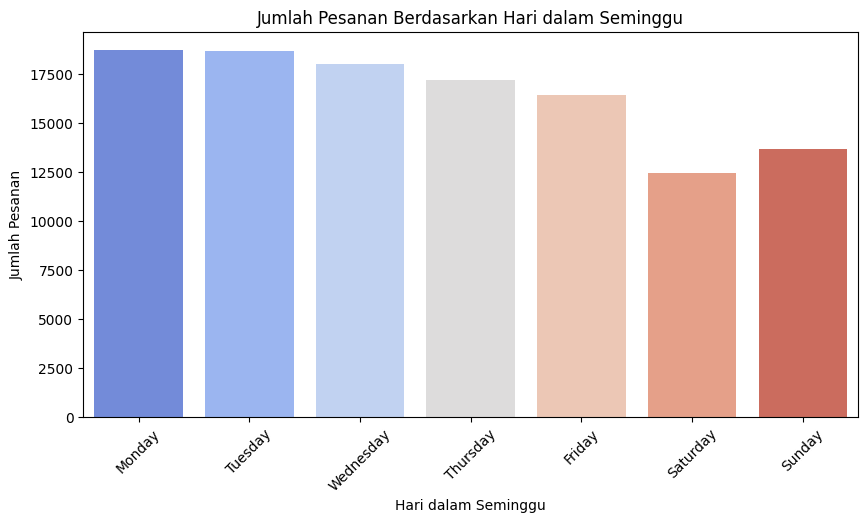

In [108]:
# Tambahkan kolom hari dalam seminggu
all_df['order_purchase_dayofweek'] = all_df['order_purchase_timestamp'].dt.day_name()

# Hitung jumlah pesanan per hari dalam seminggu
order_per_day = all_df['order_purchase_dayofweek'].value_counts()

# Urutkan sesuai urutan hari
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
order_per_day = order_per_day.reindex(days_order)

# Tampilkan tabel jumlah pesanan per hari dalam seminggu
order_per_day_df = order_per_day.reset_index()
order_per_day_df.columns = ["Hari", "Jumlah Pesanan"]
display(order_per_day_df)

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(x=order_per_day.index, y=order_per_day.values, hue=order_per_day.index, palette='coolwarm', legend=False)
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Pesanan")
plt.title("Jumlah Pesanan Berdasarkan Hari dalam Seminggu")
plt.xticks(rotation=45)
plt.show()


**Insight**
- Pesanan cenderung lebih tinggi pada hari kerja, dengan puncaknya pada Senin (15.703 pesanan) dan menurun secara bertahap hingga Jumat. Akhir pekan menunjukkan aktivitas belanja lebih rendah, terutama pada Sabtu (10.548 pesanan)

### Apakah Ada Perbedaan Rata-rata Nilai Transaksi Berdasarkan Metode Pembayaran?

payment_type
credit_card    178.925872
boleto         176.354729
debit_card     149.046140
voucher         64.692213
Name: payment_value, dtype: float64


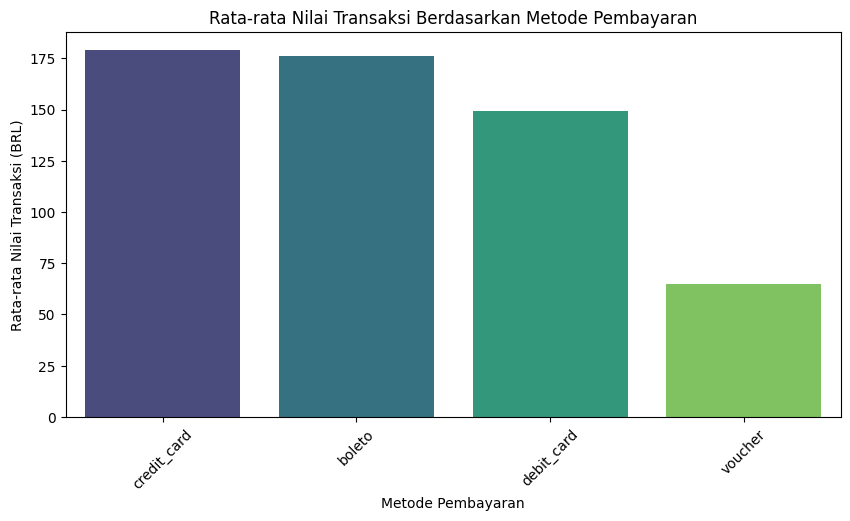

In [109]:
payment_avg = all_df.groupby('payment_type')['payment_value'].mean().sort_values(ascending=False)
print(payment_avg)

plt.figure(figsize=(10, 5))
sns.barplot(x=payment_avg.index, y=payment_avg.values, hue=payment_avg.index, palette='viridis', legend=False)
plt.xlabel("Metode Pembayaran")
plt.ylabel("Rata-rata Nilai Transaksi (BRL)")
plt.title("Rata-rata Nilai Transaksi Berdasarkan Metode Pembayaran")
plt.xticks(rotation=45)
plt.show()

**Insight**
- Pembayaran dengan kartu kredit memiliki rata-rata nilai transaksi tertinggi, diikuti oleh boleto dan debit card. Sementara itu, transaksi dengan voucher memiliki nilai rata-rata terendah, kemungkinan karena penggunaannya untuk diskon atau promo tertentu.

### RFM

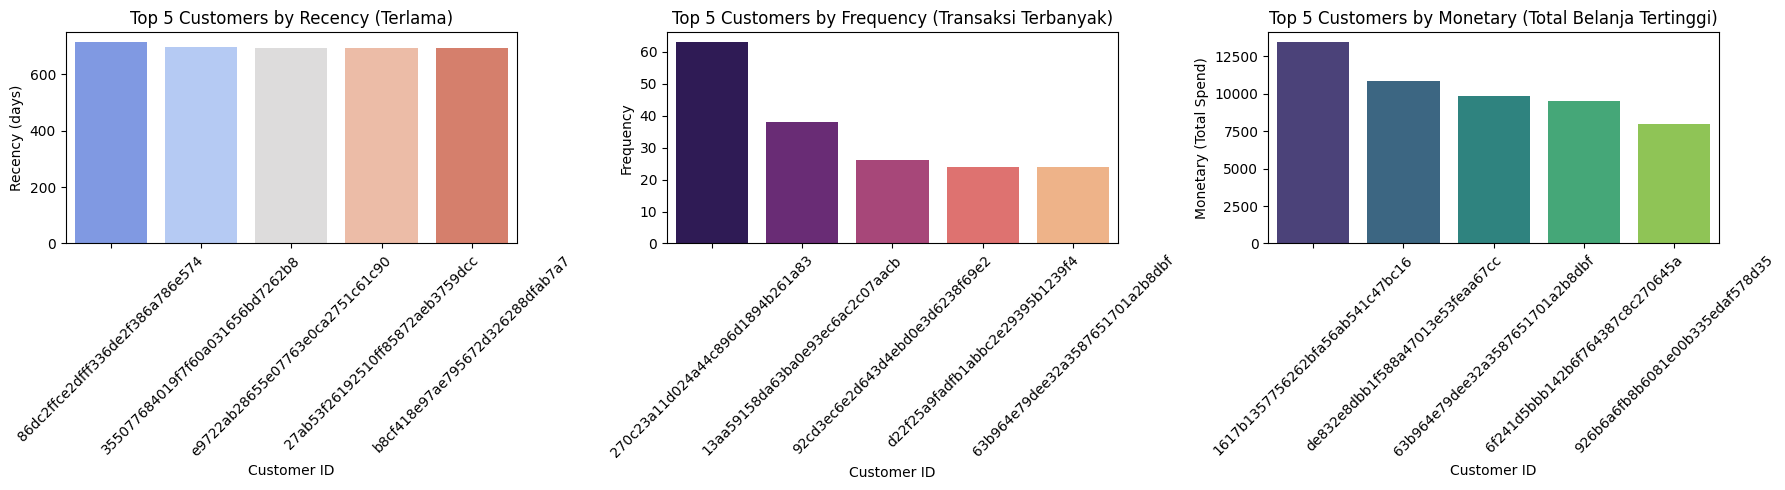

In [110]:
# Urutkan data untuk visualisasi
top_recency = rfm.sort_values(by="Recency", ascending=False).head(5)
top_frequency = rfm.sort_values(by="Frequency", ascending=False).head(5)
top_monetary = rfm.sort_values(by="Monetary", ascending=False).head(5)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=top_recency["customer_id"], y=top_recency["Recency"],hue=top_recency["customer_id"], palette="coolwarm", ax=axes[0])
axes[0].set_title("Top 5 Customers by Recency (Terlama)")
axes[0].set_xlabel("Customer ID")
axes[0].set_ylabel("Recency (days)")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=top_frequency["customer_id"], y=top_frequency["Frequency"],hue=top_frequency["customer_id"], palette="magma", ax=axes[1])
axes[1].set_title("Top 5 Customers by Frequency (Transaksi Terbanyak)")
axes[1].set_xlabel("Customer ID")
axes[1].set_ylabel("Frequency")
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x=top_monetary["customer_id"], y=top_monetary["Monetary"],hue=top_monetary["customer_id"], palette="viridis", ax=axes[2])
axes[2].set_title("Top 5 Customers by Monetary (Total Belanja Tertinggi)")
axes[2].set_xlabel("Customer ID")
axes[2].set_ylabel("Monetary (Total Spend)")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Insight:**
- Pelanggan terbaru cenderung hanya melakukan satu transaksi dengan nilai pembelian yang bervariasi.
- Pelanggan dengan frekuensi transaksi tertinggi tidak selalu memiliki nilai pembelian terbesar, menunjukkan bahwa loyalitas tidak selalu berbanding lurus dengan pengeluaran.
- Sebaliknya, pelanggan dengan total pembelian tertinggi memiliki frekuensi transaksi rendah, yang berarti mereka cenderung melakukan sedikit pembelian dalam jumlah besar.

## Conclusion

### Pola Pembayaran yang Paling Sering Digunakan  
- Mayoritas pelanggan menggunakan **credit card** sebagai metode pembayaran utama, mencakup hampir **77%** dari total transaksi.  
- Metode **boleto** berada di posisi kedua dengan sekitar **20%**, sementara **voucher** dan **debit card** hanya digunakan oleh sebagian kecil pelanggan.  
- Hal ini menunjukkan bahwa pelanggan lebih memilih **pembayaran instan** dibandingkan metode yang membutuhkan proses verifikasi lebih lama seperti boleto.  

### Berapa Lama Rata-rata Waktu Pengiriman dari Pembelian hingga Diterima Pelanggan? 
- Rata-rata waktu pengiriman dari pembelian hingga diterima pelanggan adalah sekitar **10,56 hari**.  
- Mayoritas pesanan dikirim dalam rentang **6 hingga 14 hari**.  
- Meskipun ada pesanan yang dikirim lebih cepat, beberapa pesanan membutuhkan waktu hingga **28 hari**, yang mungkin disebabkan oleh faktor logistik atau lokasi pengiriman.

### Apakah Ada Pola Khusus dalam Jumlah Pesanan Berdasarkan Hari dalam Seminggu?

- Jumlah pesanan cenderung lebih tinggi pada **hari Senin hingga Rabu**, dengan puncak pada **hari Senin (15.703 pesanan)**.  
- Jumlah pesanan mulai menurun dari **Kamis hingga Jumat**, dan mencapai titik terendah pada **hari Sabtu (10.548 pesanan)**.  
- Pola ini menunjukkan bahwa pelanggan lebih aktif berbelanja di awal minggu, kemungkinan karena mereka merencanakan kebutuhan setelah akhir pekan, sementara aktivitas belanja menurun menjelang akhir pekan.  

### Apakah Ada Perbedaan Rata-rata Nilai Transaksi Berdasarkan Metode Pembayaran?

- **Credit card memiliki rata-rata nilai transaksi tertinggi**, sedikit lebih tinggi dibandingkan **boleto** dan **debit card**.  
- **Voucher memiliki rata-rata nilai transaksi terendah**, kemungkinan karena digunakan untuk diskon atau promosi.  
- Perbedaan ini menunjukkan bahwa pelanggan yang membayar dengan **credit card cenderung berbelanja dengan nilai lebih besar**, sedangkan metode pembayaran seperti voucher lebih sering digunakan untuk transaksi dengan nominal lebih kecil.  
